In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
tf.config.list_physical_devices('GPU')



[]

In [35]:
mnist = tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [36]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [37]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

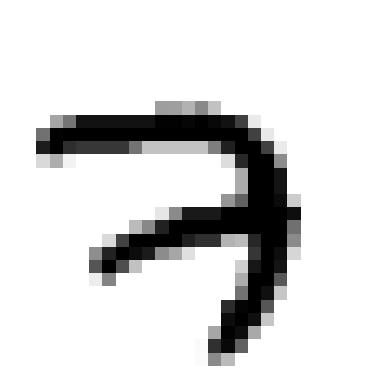

7

In [38]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

<AxesSubplot:>

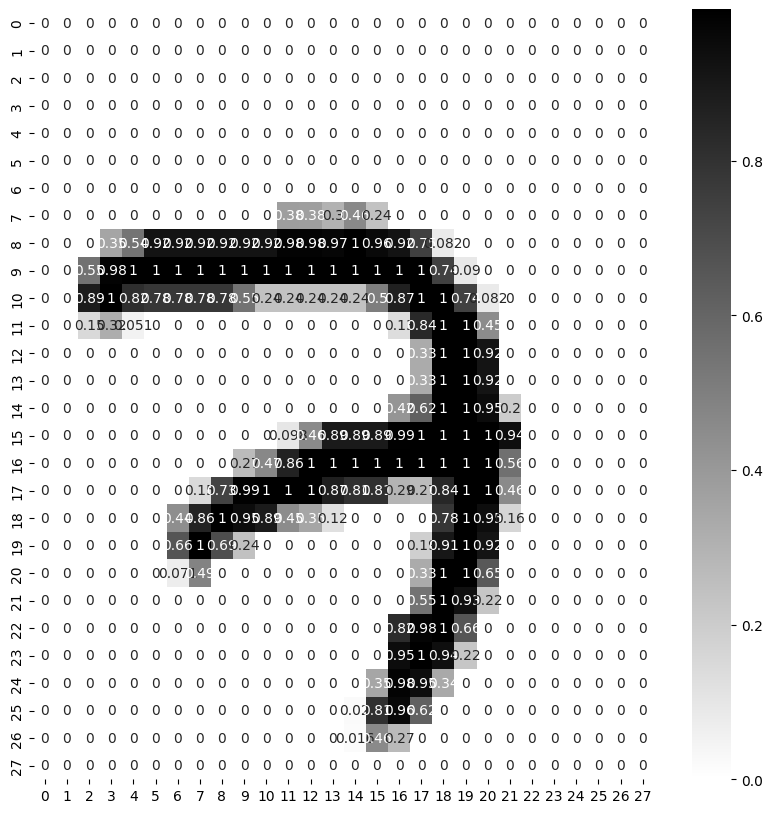

In [39]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(X_train[0], annot=True, cmap="binary")

Writing samples to Tensorboard

In [40]:
##get unique timestamp

import time

def get_timestamp():
    return time.asctime().replace(' ','_').replace(':','')


In [41]:
import os 

def get_log_dir_path(log_dir = 'logs/fit'):
    log_path=os.path.join(log_dir,get_timestamp())
    print(f'logs will be saved at : {log_path}')
    return log_path

log_dir = get_log_dir_path()
log_dir

logs will be saved at : logs/fit/Tue_Sep__6_172100_2022


'logs/fit/Tue_Sep__6_172100_2022'

In [42]:
file_writer = tf.summary.create_file_writer(logdir=log_dir)

In [43]:
with file_writer.as_default():
    images = np.reshape(X_train[10:30] , (-1,28,28,1))
    tf.summary.image('20 handwritten digit samples : ', images, max_outputs=25, step=0)

In [66]:
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [67]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 7145), started 0:03:58 ago. (Use '!kill 7145' to kill it.)

In [46]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),
          
]

In [47]:
model = tf.keras.models.Sequential(LAYERS)

In [48]:
model.layers

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [50]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [51]:
hidden1.get_weights() #weights + bias

[array([[ 0.00850106, -0.05533943, -0.0383265 , ...,  0.04649772,
          0.00805013,  0.02237447],
        [-0.00824347, -0.00185857,  0.01921952, ...,  0.0609065 ,
         -0.06876607,  0.02405911],
        [ 0.04604332,  0.01926883,  0.06974238, ..., -0.01299227,
          0.03045444,  0.05445983],
        ...,
        [ 0.07194096, -0.02531091,  0.04525565, ...,  0.05605403,
         -0.05906922,  0.04653962],
        [ 0.06795581, -0.06421921,  0.06149594, ..., -0.07159778,
         -0.06634275,  0.00553618],
        [ 0.01568771, -0.05874266, -0.04944214, ...,  0.02063028,
          0.03088506, -0.03412455]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [52]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 300)

In [53]:
biases.shape

(300,)

loss_function(actual, pred) = error

In [54]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


Important -
Epochs: Integer.

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

batch_size: Integer or None.

Number of samples per gradient update. If unspecified, batch_size will default to 32.

NOTE: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

validation_batch_size: Integer or None.

Number of samples per validation batch.

If unspecified, will default to batch_size.

NOTE: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

Reference

##   Callbacks

In [68]:
### tensorboard callback

In [77]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

### early_stopping

In [81]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True) 

### checkpoint

In [74]:
CKPT_Path = 'model_ckpt.h5'

checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_Path, save_best_only=True)

In [82]:
LIST_OF_CALLBACKS = [tensorboard_cb, early_stopping_cb, checkpoint_cb]

In [84]:
EPOCHS = 300
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET , callbacks=LIST_OF_CALLBACKS)

Epoch 1/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.0663 - val_accuracy: 0.9816
Epoch 2/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0119 - accuracy: 0.9986 - val_loss: 0.0668 - val_accuracy: 0.9820
Epoch 3/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0113 - accuracy: 0.9987 - val_loss: 0.0659 - val_accuracy: 0.9814
Epoch 4/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0107 - accuracy: 0.9989 - val_loss: 0.0667 - val_accuracy: 0.9810
Epoch 5/300
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0102 - accuracy: 0.9989 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 6/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0099 - accuracy: 0.9992 - val_loss: 0.0658 - val_accuracy: 0.9818
Epoch 7/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0094 - accuracy: 0.9993 - val_loss: 0.0664 - val_ac

In [56]:
print(f'no. of batches: {55000/32} \n each batch size(default): 32')

no. of batches: 1718.75 
 each batch size(default): 32


In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 817us/step - loss: 0.0740 - accuracy: 0.9756


[0.07402987033128738, 0.975600004196167]

In [58]:
model.save("model.h5")

In [59]:
loaded_model = tf.keras.models.load_model("model.h5")

In [60]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 818us/step - loss: 0.0740 - accuracy: 0.9756


[0.07402987033128738, 0.975600004196167]

In [61]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.594708,0.843273,0.306048,0.9156
1,0.286678,0.917709,0.237348,0.9364
2,0.233676,0.933818,0.201237,0.9436
3,0.199046,0.944509,0.175094,0.9534
4,0.173849,0.950691,0.155771,0.9588
5,0.153650,0.956855,0.141937,0.9618
6,0.137698,0.961673,0.128394,0.9650
7,0.124090,0.965218,0.117845,0.9666
8,0.113035,0.968182,0.112684,0.9704
9,0.103079,0.971164,0.109092,0.9706


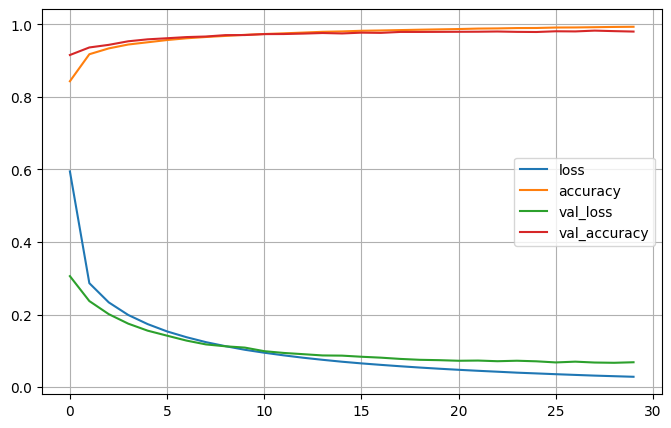

In [62]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [63]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

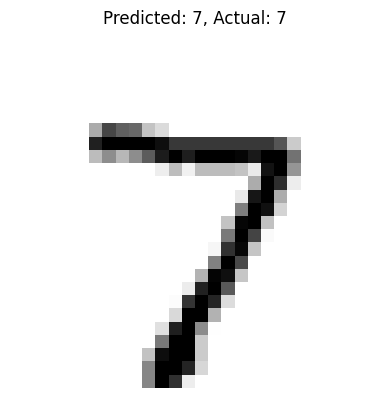

------------------------------------------------------------


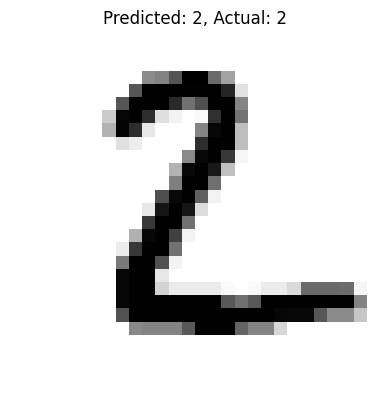

------------------------------------------------------------


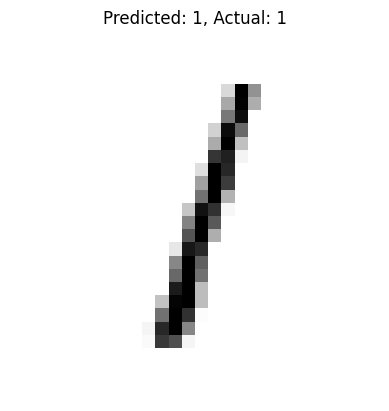

------------------------------------------------------------


In [65]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [85]:
ckpt_model = tf.keras.models.load_model("model_ckpt.h5")

In [86]:
ckpt_history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    validation_data=VALIDATION_SET , callbacks=LIST_OF_CALLBACKS)

Epoch 1/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0086 - accuracy: 0.9993 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 2/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0666 - val_accuracy: 0.9822
Epoch 3/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0080 - accuracy: 0.9995 - val_loss: 0.0666 - val_accuracy: 0.9822
Epoch 4/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.0673 - val_accuracy: 0.9812
Epoch 5/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0073 - accuracy: 0.9995 - val_loss: 0.0665 - val_accuracy: 0.9820
Epoch 6/300
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0665 - val_accuracy: 0.9828
